##### Assignment 4 - Linear Regression

## Part 1 - Read your data frame.
The CSV file is "cars.csv".  This data came from Riverside and you can see the original data and the notebook I used to create the csv from the data.  Six of the instances were missing the horsepower feature and the missing values were replaced by the average of the other instances.

In [1]:
import pandas as pd
dataframe = pd.read_csv("cars.csv")
dataframe.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

## Part 2 - Display info
Take a look at the information.  Note any features that are missing values.  Note any features that are objects, but could be numerical

In [2]:
# Your code here
print(dataframe.info())

dataframe.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### _Notes_
(Your notes here)

## Part 3 - Split the data frame

Use the train_test_split() function to split the data set into training(75%) and test(25%) sets. 

In [6]:
# Your code here
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataframe, test_size=0.25, random_state=531)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

298 100
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
73   13.0          8         307.0       130.0  4098.0          14.0   
392  27.0          4         151.0        90.0  2950.0          17.3   
197  29.0          4          90.0        70.0  1937.0          14.2   
363  22.4          6         231.0       110.0  3415.0          15.8   
204  32.0          4          85.0        70.0  1990.0          17.0   

     model year  origin                          car name  
73           72       1  chevrolet chevelle concours (sw)  
392          82       1                  chevrolet camaro  
197          76       2                         vw rabbit  
363          81       1                     buick century  
204          76       3                      datsun b-210  
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
276  21.6          4         121.0       115.0  2795.0          15.7   
362  24.2          6         146.0       120.0  2930.0 

## Part 4 - Do some scatter plots
Our goal is to predict the mpg for a car.  Take a look at some of the features with respect to "mpg".  Make sure to look at "weight".

Use scatter_matrix.

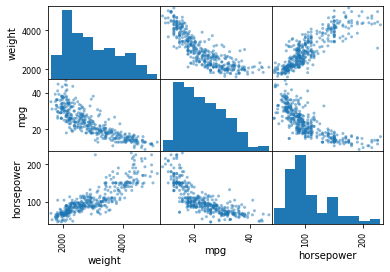

In [7]:
# Your code here

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attr = ["weight","mpg","horsepower"]
scatter_matrix(dataframe[attr])
plt.show()

## Part 5 - Linear Regression
1. Pull out "weight" for the X and "mpg" for y. 
2. Fit the data.
3. Show R2 and Mean Square Error
4. Discuss the results

In [8]:
# Your code here

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
lreg = LinearRegression()
X = train_set[["weight"]]
Y = train_set["mpg"]
print(lreg.fit(X, Y))

#R2 value using score method
print(lreg.score(X,Y))

y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
# r2mse = sqrt(mse)

r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)

LinearRegression()
0.6852575176022858
mean squared error is  18.969140008716995
The root mean squared error is  0.6852575176022858


Discussion: Mean squared error is 18.96. Which states that the model is just ok with one feature provided to X.

## Part 6 - Add features to X
1. Pick up to 3 other features that you think might improve the model and use them for X.
2. Fit the data
3. Show the scores
4. Discuss the results

In [9]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
lreg = LinearRegression()
X = train_set[["horsepower","model year","acceleration","weight"]]
Y = train_set["mpg"]
print(lreg.fit(X, Y))

#R2 value using score method
print(lreg.score(X,Y))

y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)

LinearRegression()
0.8026051249945556
mean squared error is  11.89674489587955
The root mean squared error is  0.8026051249945556


Discussion: Mean squared error is 11.89. Probability of predicting Y from X is 0.70 

## Part 7 - Add a new feature to the Model
We have an inverse relation between the weight and the mpg and we notice that there is a factor of 100 difference in scales for these two features. Lets address the issue by creating a new feature based on the weight.  Call the feature weight-inv and compute it as 50000/weight.

1. Fit the data using weight-inv and mpg
1. Show the scores
1. Scatter plot the data
1. Discuss the results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   weight-inv    398 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 31.2+ KB
298 100
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
73   13.0          8         307.0       130.0  4098.0          14.0   
392  27.0          4         151.0        90.0  2950.0          17.3   
197  29.0          4          90.0        70.0  1937.0          14.2   
363  22.4          6

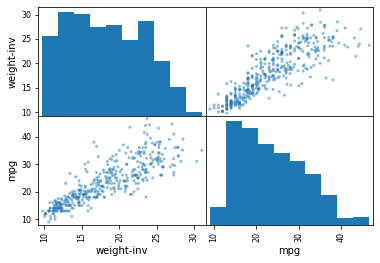

In [10]:
# Your code here

def weightinv(x):
    return (50000/x)
dataframe["weight-inv"]=dataframe["weight"].apply(weightinv)
dataframe.head()
dataframe.info()

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataframe, test_size=0.25, random_state=531)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())
print()
print("Scores using new feature")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lreg = LinearRegression()
X = train_set[["weight-inv"]]
Y = train_set["mpg"]
print(lreg.fit(X, Y))
print(lreg.score(X,Y))

y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)
print()
print("Scatter plot the data")
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attr = ["weight-inv","mpg"]
scatter_matrix(dataframe[attr])
plt.show()

Discussion: After creating weight-inv to reduce the factor of difference between two features, we got best accuracy and mean squared error.

## Part 8 - Test Set time
Evaluate the model for r2 and mean square error on the test set and discuss your results in comparison to part 7.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 276 to 357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           100 non-null    float64
 1   cylinders     100 non-null    int64  
 2   displacement  100 non-null    float64
 3   horsepower    100 non-null    float64
 4   weight        100 non-null    float64
 5   acceleration  100 non-null    float64
 6   model year    100 non-null    int64  
 7   origin        100 non-null    int64  
 8   car name      100 non-null    object 
 9   weight-inv    100 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 8.6+ KB
3 other features along with dispalcement
LinearRegression()
0.7290782800314595
mean squared error is  17.04003852594838
The root mean squared error is  0.7290782800314595

Unscaled features of weight

LinearRegression()
0.713187856863778
mean squared error is  18.039491146440966
The root mean squared error is  0.7

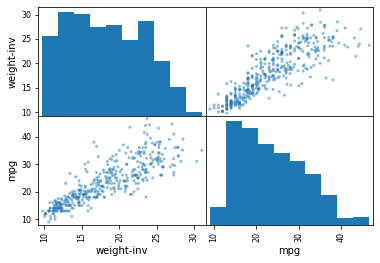

In [11]:
# Your code here

test_set.info()
print("3 other features along with dispalcement")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lreg = LinearRegression()
X = test_set[["horsepower","displacement","acceleration","weight"]]
Y = test_set["mpg"]
print(lreg.fit(X, Y))
print(lreg.score(X,Y))

y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)
# Unscaled features
print("\nUnscaled features of weight\n")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lreg = LinearRegression()
X = test_set[["weight"]]
Y = test_set["mpg"]
print(lreg.fit(X, Y))


print(lreg.score(X,Y))

y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)
print("\n")
print("Scaled features of weight:\n")
# scaled features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lreg = LinearRegression()
X = test_set[['weight-inv']]
Y = test_set['mpg']
print(lreg.fit(X, Y))

print(lreg.score(X,Y))

y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)

print("\nScatter plot")

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
at = ['weight-inv','mpg']
scatter_matrix(dataframe[at])
plt.show()


Discussion: Comparing with previous set accuracy, r2 and mean square error was best

# Bonus options
For each of the options, redo your regression using the new features, report the results and discuss.


1. Look for a better set of features to predict mpg.  
2. Add in polynomial features.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# features=['mpg','weight','cylinders','displacement','model year']

# plt.figure(figsize=(8, 8))
# sns.heatmap(test_set.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');


# pd.plotting.scatter_matrix(test_set[features], alpha=0.2,figsize=(12,12))
# plt.show()

print("Better set of features")
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataframe, test_size=0.25, random_state=225)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lreg = LinearRegression()
X = train_set[["displacement","weight","acceleration", "cylinders","horsepower", "model year"]]
Y = train_set["mpg"]
print(lreg.fit(X, Y))


print(lreg.score(X,Y))

y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)


print("Polynomial features")

from sklearn.linear_model import LinearRegression
reg_plus_cube = LinearRegression()


X = train_set[["displacement","cylinders","horsepower","weight","acceleration","model year"]]
Y = train_set["mpg"]

from sklearn.preprocessing import PolynomialFeatures
create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)
               
               
reg_plus_cube.fit(X_cube_terms, Y)

print(reg_plus_cube.score(X_cube_terms,Y))
y_pred = lreg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)
r2mse = r2_score(Y, y_pred)
print("The root mean squared error is ", r2mse)




Better set of features
LinearRegression()
0.8332204707701616
mean squared error is  10.213557410849386
The root mean squared error is  0.8332204707701616
Polynomial features
0.9473396106637867
mean squared error is  379989.9303655761
The root mean squared error is  -6203.943013403933


C:\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Using Polynomial feature, the propability is increased to 0.94. But mean squared error is high